# **Coronary Artery Disease Prediction using Neural Networks**

### **Description**

The coronary arteries are the blood vessels that carry blood to the heart. Coronary artery disease refers to the narrowing or blockage of the coronary arteries. If the heart does not get enough blood, it cannot get the oxygen and nutrients that it requires to function efficiently. This can cause chest pain or a heart attack. It is caused by plaque buildup in the walls of the arteries. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, it can be diagonsed that whether a patient is suffering from the disease or not. Moreover, patients can be classified according to varying degrees of coronary artery disease. This would enhance the medical treatment by suggesting appropriate measures that are required to be adopted to deal with the respective condition of the patient.




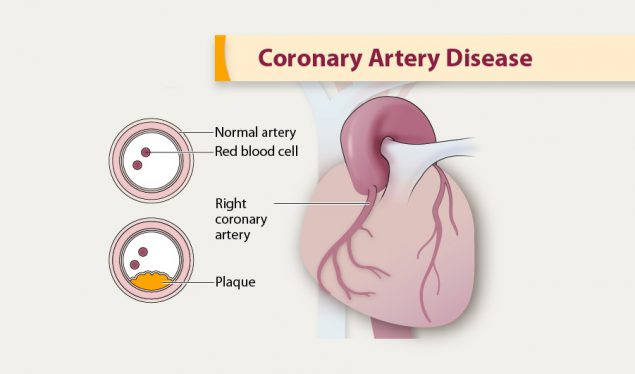

Source of the image: https://www.cdc.gov/heartdisease/coronary_ad.htm



### **Requirements**

*   Python: 3.7.3
*   Pandas: 0.24.2
*   Numpy: 1.16.2
*   Sklearn: 0.20.3
*   Matplotlib: 3.0.3
*   Keras: 2.2.4
*   Seaborn: 0.11.1










In [12]:
# Import necessary libraries

import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### **Dataset**

This project uses a dataset of 303 patients, distributed by the UCI Machine Learning Repository. 

In [8]:
# Load the dataset to df

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']
df = pd.read_csv(url, names=names)

# Examine the dataset
print("Shape of the dataframe: {}".format(df.shape))
print(df.loc[1])


Shape of the dataframe: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


### **Data Pre-processing**

In [9]:
# Examine the first twenty entries

df.loc[:20]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [10]:
# Examine the last twenty entries

df.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


### **Missing Data**

Seaborn can be used to create a simple heatmap to see the missing values.

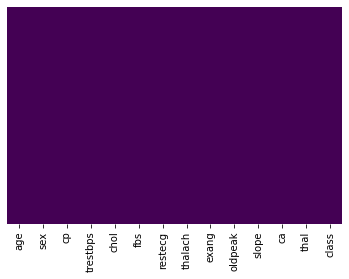

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
# Remove missing data, denoted by "?"
df = df[~df.isin(['?'])]

In [30]:
# Drop rows with NaN
df = df.dropna(axis=0)

In [31]:
# Re-examine the shape and data type of df
print(df.shape)
print(df.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


In [32]:
# Convert data into numeric 
df = df.apply(pd.to_numeric)
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


In [33]:
# Description of the modified dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### **Exploratory Data Analysis**

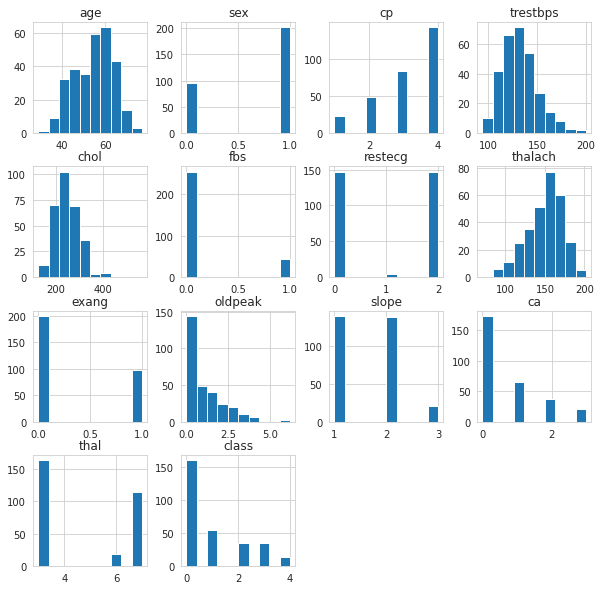

In [34]:
# Plot histograms for each variable
df.hist(figsize=(10, 10))
plt.show()

Plot to show the number of patients that belong to each category of the disease.

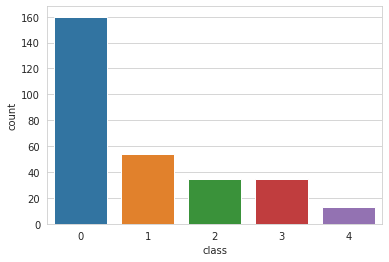

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df)

Plot to show the number of samples present corresponding to the ages(in years).


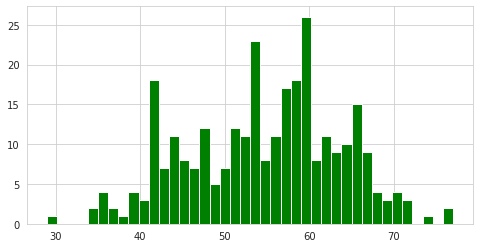

In [36]:
df['age'].hist(color='green',bins=40,figsize=(8,4))

Plot to show the count of male(1.0) and female(0.0) patients that suffer from various degrees of the disease.

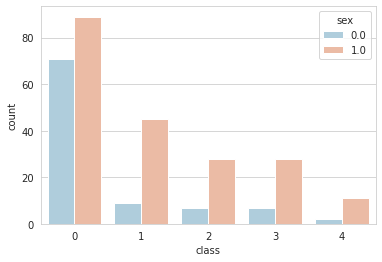

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='sex',data=df,palette='RdBu_r')


1 denotes male and 0 denotes female.

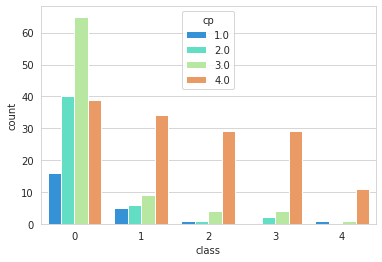

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='cp',data=df,palette='rainbow')

cp denotes 'Chest Pain Type'.

### **Creating training and testing datasets**

In [39]:
# Create input X and output y for training
from sklearn import model_selection

X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [40]:
# Convert the data to categorical labels
from keras.utils.np_utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=None)
y_test_categorical = to_categorical(y_test, num_classes=None)

print(y_train_categorical.shape)
print(y_test_categorical.shape)

(237, 5)
(60, 5)


In [41]:
print(y_train_categorical[:10])

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### **Build and train the Neural Network**

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define training model
def create_model():
    
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # Compile the model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [43]:
# Examine the model
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
# Fit the model to the training data
model.fit(X_train, y_train_categorical, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 994us/step - loss: 1.5386 - accuracy: 0.1646
Epoch 2/100
24/24 [==============================] - 0s 994us/step - loss: 1.4235 - accuracy: 0.2827
Epoch 3/100
24/24 [==============================] - 0s 988us/step - loss: 1.3656 - accuracy: 0.5696
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3359 - accuracy: 0.5696
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3133 - accuracy: 0.5696
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2956 - accuracy: 0.5696
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2799 - accuracy: 0.5696
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2712 - accuracy: 0.5696
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2544 - accuracy: 0.5696
Epoch 10/100
24/24 [==============================] - 0s 921us/step - loss: 1.2461 - accuracy: 0.5696
E

### **Improving results - A binary classification problem**

It would be efficient to simplify the problem by converting it into a binary classification problem, i.e., heart disease or no heart disease.
Presently, the loss is very high, because it seems to be difficult to distinguish between different levels of heart disease (from 1-4).  

In [45]:
# Convert into binary classification problem
y_train_binary = y_train.copy()
y_test_binary = y_test.copy()

y_train_binary[y_train_binary > 0] = 1
y_test_binary[y_test_binary > 0] = 1

print(y_train_binary[:20])

[0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0]


In [46]:
# Define training model
def create_binary_model():
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [47]:
# Re-examine the model
binary_model = create_binary_model()
print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
# Fit the model on the training data
binary_model.fit(X_train, y_train_binary, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.5696
Epoch 2/100
24/24 [==============================] - 0s 981us/step - loss: 0.6929 - accuracy: 0.5696
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5696
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5696
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.5696
Epoch 6/100
24/24 [==============================] - 0s 962us/step - loss: 0.6622 - accuracy: 0.5738
Epoch 7/100
24/24 [==============================] - 0s 974us/step - loss: 0.6499 - accuracy: 0.5992
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6245
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.7046
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.7342
Epo

### **Results and metrics**

Test the performance of both our categorical model and binary model on the testing dataset.

In [49]:
# Test on categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print("Results for categorical model")
print("Accuracy score: {}".format(accuracy_score(y_test, categorical_pred)))
print("Classification report: ")
print(classification_report(y_test, categorical_pred))

Results for categorical model
Accuracy score: 0.5
Classification report: 
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        25
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         9
           3       0.29      1.00      0.44         6
           4       0.00      0.00      0.00         5

    accuracy                           0.50        60
   macro avg       0.18      0.39      0.24        60
weighted avg       0.28      0.50      0.36        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Test on binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print("Results for categorical model")
print("Accuracy score: {}".format(accuracy_score(y_test_binary, binary_pred)))
print("Classification report: ")
print(classification_report(y_test_binary, binary_pred))

Results for categorical model
Accuracy score: 0.7833333333333333
Classification report: 
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        25
           1       0.92      0.69      0.79        35

    accuracy                           0.78        60
   macro avg       0.80      0.80      0.78        60
weighted avg       0.82      0.78      0.78        60

